In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/Ecosystem_NPP.csv"
npp_df = pd.read_csv(csv_file)

In [4]:
veg_type = npp_df.groupby('Vegetation', observed=True)
site_type = npp_df.groupby('Site', observed=True)

In [ ]:
site_type.describe()

MeanNPPobs_gCm−2yr−1                                    \
                                      count   mean         std    min     25%   
Site                                                                            
Arctic Plain                            1.0   64.0         NaN   64.0   64.00   
Boreal Forest                           2.0  216.0   49.497475  181.0  198.50   
Desert grassland                        1.0   54.0         NaN   54.0   54.00   
Mid-west Agricultrual                   2.0  609.0  325.269119  379.0  494.00   
Temperate Conifer                       1.0  356.0         NaN  356.0  356.00   
Temperate Forest                        2.0  615.5   89.802561  552.0  583.75   

                                             Precipitation_cm         ...  \
                          50%     75%    max            count   mean  ...   
Site                                                                  ...   
Arctic Plain             64.0   64.00   64.0              1.0    5.0  ...   
Boreal Forest           216.0  233.50  251.0              2.0   52.0  ...   
Desert grassland         54.0   54.00   54.0              1.0   35.0  ...   
Mid-west Agricultrual   609.0  724.00  839.0              2.0   99.0  ...   
Temperate Conifer       356.0  356.00  356.0              1.0   44.0  ...   
Temperate Forest        615.5  647.25  679.0              2.0  111.0  ...   

                        MAT_C         C:N                                      \
                          75%    max count  mean       std   min    25%   50%   
Site                                                                            
Arctic Plain           -10.91 -10.91   1.0  25.0       NaN  25.0  25.00  25.0   
Boreal Forest           -3.20  -3.20   2.0  55.0  7.071068  50.0  52.50  55.0   
Desert grassland        13.57  13.57   1.0  24.0       NaN  24.0  24.00  24.0   
Mid-west Agricultrual   11.23  11.23   2.0  10.5  0.707107  10.0  10.25  10.5   
Temperate Conifer        7.75   7.75   1.0  40.0       NaN  40.0  40.00  40.0   
Temperate Forest         8.31   8.31   2.0  30.5  9.192388  24.0  27.25  30.5   

                                     
                          75%   max  
Site                                 
Arctic Plain            25.00  25.0  
Boreal Forest           57.50  60.0  
Desert grassland        24.00  24.0  
Mid-west Agricultrual   10.75  11.0  
Temperate Conifer       40.00  40.0  
Temperate Forest        33.75  37.0  

[6 rows x 32 columns]

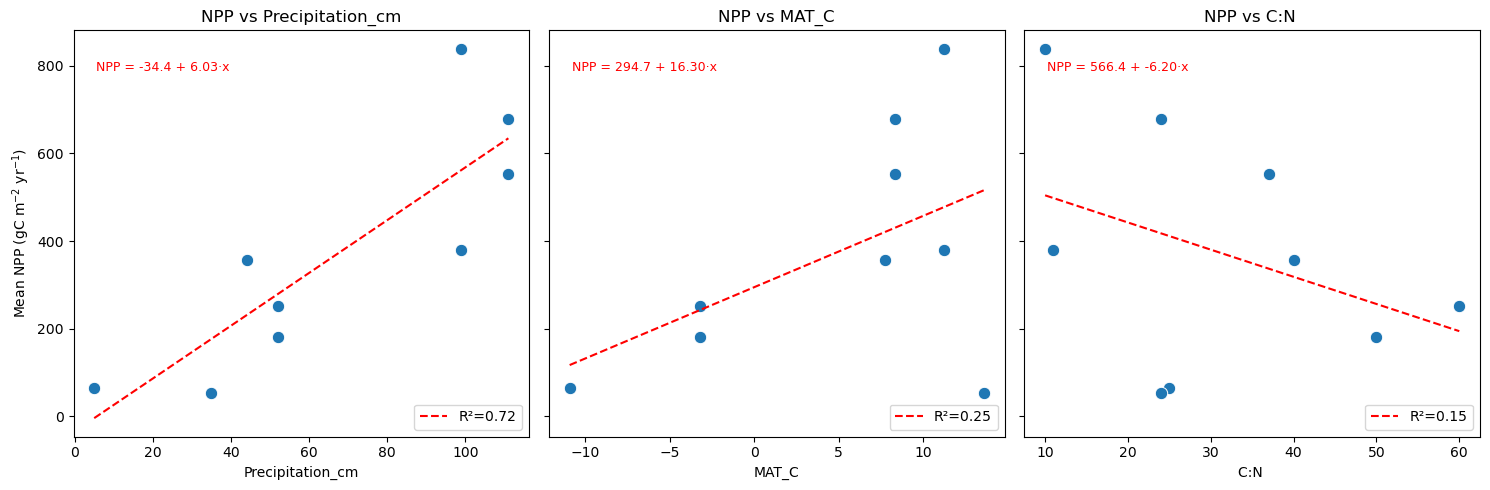

In [15]:
x_columns = ["Precipitation_cm", "MAT_C", "C:N "]

fig, axes = plt.subplots(1, len(x_columns), figsize=(15, 5), sharey=True)

for i, col in enumerate(x_columns):
    x = npp_df[col]
    y = npp_df["MeanNPPobs_gCm−2yr−1"]

    sns.scatterplot(x=x, y=y, ax=axes[i], s=80, color="tab:blue")

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = intercept + slope * x_fit
    axes[i].plot(x_fit, y_fit, color="red", linestyle="--", label=f"R²={r_value**2:.2f}")
    axes[i].text(0.05, 0.9,
             f"NPP = {intercept:.1f} + {slope:.2f}·x",
             transform=axes[i].transAxes,
             fontsize=9,
             color="red")

    axes[i].set_title(f"NPP vs {col}")
    axes[i].set_xlabel(col)
    if i == 0:
        axes[i].set_ylabel("Mean NPP (gC m$^{-2}$ yr$^{-1}$)")
    else:
        axes[i].set_ylabel("")
    axes[i].legend(loc="lower right")

plt.tight_layout()
plt.show()


Figure 1. Mean annual Net Primary Productivity along the y-axis at each site plotted against annual precipitation (left), mean annual temperature (center), and C:N ratios (right) along the x-axis. Note different scales for subplots along the x-axis.The red dashed line represents best-fit line calculated for each subplot. Net Primary Producitivity shows a postive relationship with precipitation $(R^{2}=0.72)$ and mean annual temperature $(R^{2}=0.25)$, and a negative relationship with C:N ratios $(R^{2}=0.15)$. Base on the $(R^{2})$ values, mean annual precipitation seems to be the best predictor of productivity. Ecosystems with higher annual precipiation have shorter residence times of water and the incoming water brings more bioavaliable nutrients.

# Part 2

In [24]:
mean_temp = 4 # degree C
mean_precip = 60 # cm
foliar_ratio = 39 # unitless ratio

predictor_labels = ["mean annual precipitation", "mean annual temperature", "C:N ratio"]
predictor_units = ["cm", "degree C", " "]
predictor_values = [60, 4, 39]

NPP_precip = 6.03 * mean_precip - 34.4
NPP_temp = 16.3 * mean_temp + 294.7
NPP_foliar = 566.4 - 6.2 * foliar_ratio


In [25]:
from IPython.display import display, Markdown

display(Markdown(
    fr"""
- NPP predicted from precipitation: {NPP_precip:.0f} $\,gC\,m^{{-2}}\,yr^{{-1}}$
- NPP predicted by mean annual temperature: {NPP_temp:.0f} $\,gC\,m^{{-2}}\,yr^{{-1}}$
- NPP predicted by foliar ratio: {NPP_foliar:.0f} $\,gC\,m^{{-2}}\,yr^{{-1}}$
"""
))



- NPP predicted from precipitation: 327 $\,gC\,m^{-2}\,yr^{-1}$
- NPP predicted by mean annual temperature: 360 $\,gC\,m^{-2}\,yr^{-1}$
- NPP predicted by foliar ratio: 325 $\,gC\,m^{-2}\,yr^{-1}$


In [15]:
area = 400 # km2

conversion_factor = 1e-10 # Tgkm-2yr-1

time_step = 10 # years

NPP_values = NPP_precip, NPP_temp, NPP_foliar

calc = [val * conversion_factor * area * time_step for val in NPP_values]

In [16]:
for response, predictor, lable, unit in zip(calc, predictor_values, predictor_labels, predictor_units):
    print(f'{response:.4e} Teragrams of Carbon based on {lable} of {predictor} {unit}\n')

1.3096e-04 Teragrams of Carbon based on mean annual precipitation of 60 cm

1.4396e-04 Teragrams of Carbon based on mean annual temperature of 4 degree C

1.2984e-04 Teragrams of Carbon based on C:N ratio of 39  



Changes in climate could effect precipitation and temperature. The changes probably not be linear (a simple decrease or increase) but manifest as greater annual variability which might lower NPP during dry hot periods. Other variables that could predict NPP include phosphorus or some measure of incoming light. 